In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [2]:
target.value_counts()

not donated    570
donated        178
Name: Class, dtype: int64

In [3]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")

dummy.fit(data, target)

dummy.score(data, target)

0.7620320855614974

In [4]:
from sklearn.model_selection import cross_val_score

# cross_val_score?

score = cross_val_score(dummy, data, target, scoring="balanced_accuracy")
score.mean()

0.5

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [6]:
from sklearn import set_config
set_config(display='diagram')
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [7]:
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=1),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 1,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [8]:
from sklearn.model_selection import cross_validate
# cross_validate?

scores = cross_validate(model, data, target, cv=10, return_train_score=True)
scores

{'fit_time': array([0.00554228, 0.00470161, 0.0043447 , 0.00639677, 0.00481558,
        0.00464082, 0.00435472, 0.00436354, 0.00422049, 0.00414562]),
 'score_time': array([0.00495172, 0.00526595, 0.00434184, 0.00626993, 0.00462389,
        0.00445938, 0.00431919, 0.00437665, 0.00405478, 0.00393391]),
 'test_score': array([0.34666667, 0.57333333, 0.72      , 0.41333333, 0.58666667,
        0.66666667, 0.62666667, 0.74666667, 0.55405405, 0.74324324]),
 'train_score': array([0.92570579, 0.93759287, 0.93164933, 0.93610698, 0.93610698,
        0.90044577, 0.91827637, 0.90936107, 0.89614243, 0.91988131])}

In [13]:
from sklearn.model_selection import validation_curve

neighbors_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]

train_scores, test_scores = validation_curve(
    model, data, target, param_name='kneighborsclassifier__n_neighbors',
    param_range=neighbors_range, cv=10, scoring="balanced_accuracy", n_jobs=2)

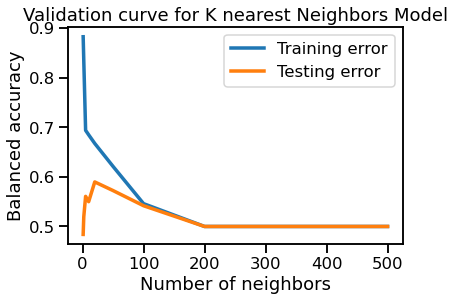

In [14]:
import matplotlib.pyplot as plt

plt.plot(neighbors_range, train_scores.mean(axis=1), label="Training error")
plt.plot(neighbors_range, test_scores.mean(axis=1), label="Testing error")
plt.legend()

plt.xlabel("Number of neighbors")
plt.ylabel("Balanced accuracy")
_ = plt.title("Validation curve for K nearest Neighbors Model")